In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

Reading the table with grbs varibles in order to atttach $E_{iso}$ and z to each event(these variables will be used for plots

In [2]:
df=pd.read_csv('table_1000_long.csv', index_col=0)

In [3]:
df.head()

,Num,Ra,Dec,Redshift,Eiso,Liso,Epeak,Duration,Gamma0(H),Gamma0(W),Phflux(15-150),alfa,beta,PhFlux(10-1000)
0,1,211.3340,71.0714,2.358773,3.873160e+53,3.471493e+52,602.763363,108.845,153.147,96.239,3.370,-1.130,-2.380,4.820
1,2,82.4082,-23.5267,1.131562,1.684641e+53,1.130565e+52,396.028272,88.762,424.473,165.292,6.918,-1.049,-2.509,9.830
2,3,92.1914,35.9299,2.023389,5.181373e+53,1.973927e+52,560.332365,259.619,362.259,179.344,2.714,-0.955,-2.473,3.836
3,4,11.8900,42.4303,2.852917,7.321880e+52,3.195091e+52,278.800372,22.905,253.767,102.093,3.175,-0.930,-2.438,4.337
4,5,105.1957,-14.9235,2.944518,1.547294e+53,4.593979e+52,568.000476,53.856,220.795,105.403,3.439,-1.002,-2.689,4.748


In [4]:
evt_details = df.loc[492] # per localizzare un evento devo dare il numero di riga. 
evt_details               # ricordati che le righe partono da 0, gli eventi da 1

Num                4.930000e+02
Ra                 2.667185e+02
Dec                5.436470e+01
Redshift           9.848727e-01
Eiso               9.081313e+51
Liso               2.026256e+51
Epeak              4.647928e+01
Duration           2.816800e+01
Gamma0(H)          4.833830e+02
Gamma0(W)          1.107860e+02
Phflux(15-150)     3.617000e+00
alfa              -9.930000e-01
beta              -2.596000e+00
PhFlux(10-1000)    5.681000e+00
Name: 492, dtype: float64

### Reading significance from npy tables

In [5]:
data= np.load('examples/Events_1_100.North.iterations.noMoon.thresh24.hidden.npy', 
              allow_pickle=True, encoding='latin1', fix_imports=True).flat[0]
events = list(data.keys())
sites = list(data[events[0]].keys())


In [6]:
# simulation conditions
# Usate solo nei nomi dei grafici. Introdotte qua per doverle modificare solo 1 volta
moon_condition = 'noMoon'
alt_thresh= 24
iterations = 'no'

In [7]:
summed={}
max_sigma=[]
z=[]
Eiso=[]
#number=[]   serve solo nel ciclo di controllo
for event in events:
    #if event!='Event1000':    # al momento c'è un problema con le chiavi per il sito 1000
        summed[event]={}      # mentre capisco cosa sia successo l'ho eliminato dalla lista
        for i,num in enumerate(df.Num):

            if event.endswith(f'Event{num}'):
               
                z.append(df.Redshift[num-1] )   #the resulting vectors will 
                Eiso.append(df.Eiso[num-1])     #have the same order as events list

                for site in sites:
                    summed[event][site]={'significance':[]}

                    for night in data[event][site]:
                        if night != 'first_night_start':
                            if type(data[event][site][night]['irf']) == float:
                                summed[event][site]['significance'].append([0.0])
                            else:
                                if '3sigma' in data[event][site][night].keys() and '3sigma' not in summed[event][site].keys():
                                    summed[event][site]['3sigma']=[data[event][site][night]['3sigma'][0],
                                                       data[event][site][night]['3sigma'][1]]
                                if '5sigma' in data[event][site][night].keys() and '5sigma' not in summed[event][site].keys():
                                    summed[event][site]['5sigma']=[data[event][site][night]['5sigma'][0],
                                                       data[event][site][night]['5sigma'][1]]
                                
                               
                                summed[event][site]['significance'].append(
                                    data[event][site][night]['significance'])

In [8]:
#for event in summed.keys():
#    print (event)

In [9]:

#ciclo di controllo per accertarsi che associ correttamente z ed Esio all'evento 
#for i,num in enumerate(number):
    #print (f' Event{num}, {z[i]-df.Redshift[num-1]} , {Eiso[i]-df.Eiso[num-1]}' )   

In [10]:
for i, event in enumerate(events):
    
    #if event!='Event1000':
        for site in sites:  
            summed[event][site]['significance']=np.hstack(summed[event][site]['significance'])
            max_sigma.append(max(summed[event][site]['significance']))


In order to inspect if everithing is fine let's print the shape of some vectors. They must be equal if the script has performed correctly. If they are not it's a big deal 

In [11]:
max_sigma=np.array(max_sigma)
print(len(max_sigma))
print (len(events))
#print (events[908],max_sigma[908])

100
100


In [12]:
z=np.array(z)   #as usual going from list to array
Eiso=np.array(Eiso)

In [13]:
z.shape     # must be equal to len(events)

(100,)

In [23]:
sel_z=[]
sel_E=[]
sel_sigma=[]
sel_events=[]


for i,event in enumerate (events):  
    #if event!='Event1000':
        for site in sites:

            #if max_sigma[i] >0 and max_sigma[i]<=20.:
            if '3sigma' in summed[event][site].keys():
               
                sel_z.append(z[i])
                sel_E.append(Eiso[i])
                sel_sigma.append(max_sigma[i])
                sel_events.append(event)
                #print(i,events[i],max_sigma[i])


In [24]:
sel_z=np.array(sel_z)
sel_E=np.array(sel_E)
no=0.0
for i in range(len(max_sigma)):
    #print (events[i])
    #print(i,max_sigma[i])
    if max_sigma[i]==0.0:
        no=no+1
        print(events[i])
print (len(events)-no)
print ((len(events)-no)/44.)

Event10
Event13
Event15
Event19
Event24
Event26
Event27
Event29
Event30
Event31
Event34
Event35
Event36
Event38
Event39
Event4
Event45
Event46
Event48
Event49
Event50
Event56
Event6
Event62
Event63
Event66
Event68
Event70
Event71
Event73
Event74
Event75
Event76
Event78
Event80
Event82
Event83
Event85
Event86
Event87
Event88
Event9
Event90
Event91
Event92
Event93
Event95
Event96
Event97
51.0
1.1590909090909092


In [25]:
print (len(sel_sigma))

9


In [26]:
print (len(sel_sigma)/44.)

0.20454545454545456


In [27]:
maximum = max(max_sigma)
print(maximum)
for i in range(len(max_sigma)):
    if max_sigma[i]== maximum:
        print (i,events[i], max_sigma[i])
    

188.62
50 Event54 188.62


In [28]:
# questo blocco serve solo per selezionare il valore di sel_sigma da cui creare la 
#legenda in modo che non faccia schifo 
for i in range(len(sel_sigma)):
    #if sel_sigma[i]!=0.0:
        print (i,sel_events[i],sel_sigma[i])

0 Event1 10.46
1 Event17 10.36
2 Event51 46.14
3 Event54 188.62
4 Event55 22.95
5 Event69 17.25
6 Event7 51.88
7 Event79 11.62
8 Event84 4.65


In [20]:
size  = 100*np.log10(sel_sigma)**2
color = cm.cool(np.log10(sel_sigma)/np.max(np.log10(sel_sigma)))
sites

['North']

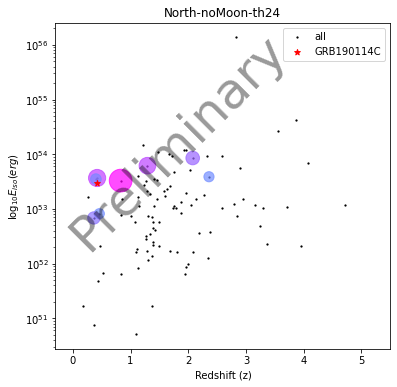

In [22]:
for site in sites:
    
    fig, axes = plt.subplots(1,figsize=(6,6)); #figsize=(12,6)
    axes.scatter(z,Eiso,s=1.5,color='black',label='all')
    axes.scatter(sel_z, sel_E, s=size, color=color, alpha=0.7)
    #la prossima riga serve solo perchè la legenda sia esteticamente bella
    #axes.scatter(sel_z[21], sel_E[21], s=size[21], color=color[21], alpha=0.7, label=r'$\sigma_{max}$')
    axes.scatter(0.42,3e53, marker ='*', color = 'red', label='GRB190114C')
    if site == 'South':
        axes.scatter(0.65,6e53, marker ='*', color = 'green', label='GRB180720B')
        axes.scatter(0.0785,1e50, marker ='*', color = 'orange', label='GRB190829A')
    axes.set_yscale('log')
    axes.set_xlim(-0.3,5.5)
    #axes.set_ylim(0.5e51,5e55)
    axes.set_xlabel('Redshift (z)')
    axes.set_ylabel(r'$\log_{10}E_{iso} (erg)$')
    axes.text(np.mean(z),np.mean(Eiso), "Preliminary",horizontalalignment='center',verticalalignment='center', fontsize=50, rotation = 45,alpha=0.4)
    axes.set_title(f'{site}-{moon_condition}-th{alt_thresh}')
    axes.legend()

    plt.savefig(f'examples/Significance-{site}-{moon_condition}-th{alt_thresh}-3sigma.png',dpi=72)
    plt.show()

Valutare se sia o meno il caso di ridurre il numero di eventi colorati scegliendo di rappresentare in questo modo solo quelli con sigma superiore a 3

# Analisi distribuzione sigma 
Serve sperabilmente a capire dove andare a parare per risolvere gli errori

In [ ]:
weights= np.ones(len(max_sigma)) / len(max_sigma)
plt.hist(max_sigma, weights=weights, color='#607c8e')#, rwidth=0.7 )
plt.show()

In [ ]:
s=[]
for sigma in max_sigma:
    if sigma < 100 and sigma > 0:
        s.append(sigma)
plt.hist(s, bins=10,)
plt.show()